APS 5 - CIÊNCIA DE DADOS

Henrique Scofield Sotto Mayor e Henrique Turco Gera

In [122]:
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

In [123]:
df_completo = pd.read_csv('dados/brasileirao-2004-2022.csv')

filtro_2009_2019 = (df_completo['season'] > 2008) & (df_completo['season'] < 2020)
df = df_completo[filtro_2009_2019]


In [124]:
df_completo['season'].unique()

array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype=int64)

In [125]:
df.head()

,season,place,team,points,played,won,draw,loss,goals_for,goals_against,goals_diff
130,2009,1,Flamengo,67,38,19,10,9,58,44,14
131,2009,2,Internacional,65,38,19,8,11,65,44,21
132,2009,3,SaoPaulo,65,38,18,11,9,57,42,15
133,2009,4,Cruzeiro,62,38,18,8,12,58,53,5
134,2009,5,Palmeiras,62,38,17,11,10,58,45,13


In [126]:
df.columns

Index(['season', 'place', 'team', 'points', 'played', 'won', 'draw', 'loss',
       'goals_for', 'goals_against', 'goals_diff'],
      dtype='object')

In [127]:
df_ = df[df['team'] == ' Cruzeiro']

In [128]:
media = df_['points'].mean()
print(media)

57.63636363636363


In [129]:
alfa = 0.05
desvio_padrao = st.poisson.std(media)
# desvio_padrao = df_['points'].std()

In [130]:
p1 = st.norm.ppf(0.025, loc = media, scale = desvio_padrao / ((len(df_) ** 0.5)))
p2 = st.norm.ppf(1-0.025, loc = media, scale = desvio_padrao / ((len(df_) ** 0.5)))
print(p1 , p2)


53.14994253300131 62.12278473972596


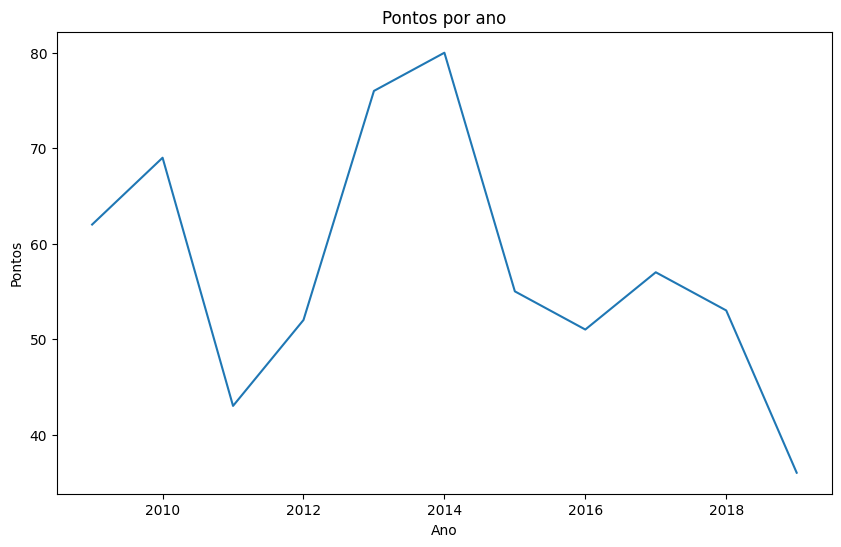

In [131]:
plt.figure(figsize=(10, 6))
plt.plot(df_['season'], df_['points'])
plt.xlabel('Ano')
plt.ylabel('Pontos')
plt.title('Pontos por ano')
plt.show()

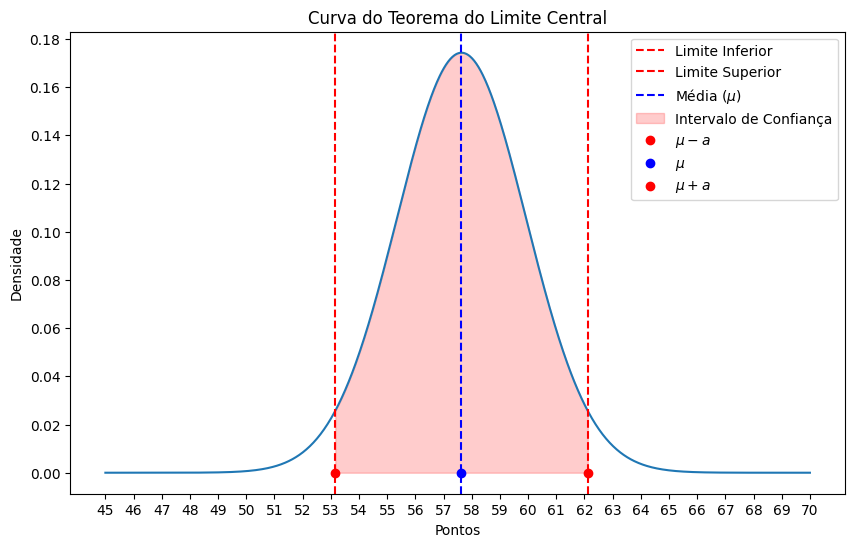

In [136]:
p1 = st.norm.ppf(0.025, loc=media, scale=desvio_padrao / ((len(df_) ** 0.5)))
p2 = st.norm.ppf(1 - 0.025, loc=media, scale=desvio_padrao / ((len(df_) ** 0.5)))

x = np.linspace(45, 70, 1000)
y = st.norm.pdf(x, loc=media, scale=desvio_padrao / ((len(df_) ** 0.5)))

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.xlabel('Pontos')
plt.ylabel('Densidade')
plt.title('Curva do Teorema do Limite Central')
plt.axvline(x=p1, color='red', linestyle='--', label='Limite Inferior')
plt.axvline(x=p2, color='red', linestyle='--', label='Limite Superior')
plt.axvline(x=media, color='blue', linestyle='--', label='Média ($\mu$)')
plt.fill_between(x, 0, y, where=(x >= p1) & (x <= p2), color='red', alpha=0.2, label='Intervalo de Confiança')
plt.xticks(np.arange(45, 71, 1))
plt.yticks(np.arange(0, 1, 0.02))

plt.scatter(p1, 0, label='$\mu-a$', color='red')
plt.scatter(media, 0, label='$\mu$', color='blue')
plt.scatter(p2, 0, label='$\mu+a$', color='red')

plt.legend()
plt.show()